## Import Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
import pydotplus

## Import Data from CSV

In [94]:
housing_data = pd.read_csv('C:/Users/kalam/OneDrive - Adobe/Personal/Data Sceince/dataset for students.csv')
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18565.000000,18565.000000,18565.000000,18565.000000,18376.000000,18565.000000,18565.000000,18565.000000,18565.000000
mean,-119.570116,35.633888,28.615890,2634.033827,537.711199,1426.223108,499.450902,3.867012,206617.794991
std,2.002922,2.137014,12.564224,2195.915548,424.125849,1142.570832,384.553175,1.895988,115447.104881
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,786.000000,279.000000,2.561200,119300.000000
50%,-118.500000,34.260000,29.000000,2123.000000,434.000000,1166.000000,408.000000,3.534100,179400.000000
75%,-118.010000,37.710000,37.000000,3141.000000,646.000000,1725.000000,603.000000,4.741100,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Correlation Data

In [95]:
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924545,-0.107575,0.043183,0.067712,0.097420,0.053778,-0.013332,-0.045035
latitude,-0.924545,1.000000,0.011147,-0.035373,-0.065896,-0.106982,-0.070205,-0.081693,-0.145263
housing_median_age,-0.107575,0.011147,1.000000,-0.359676,-0.320041,-0.294054,-0.302620,-0.121457,0.103826
total_rooms,0.043183,-0.035373,-0.359676,1.000000,0.930809,0.855342,0.918620,0.200269,0.134641
total_bedrooms,0.067712,-0.065896,-0.320041,0.930809,1.000000,0.876034,0.979671,-0.003778,0.050108
population,0.097420,-0.106982,-0.294054,0.855342,0.876034,1.000000,0.905547,0.007324,-0.023836
households,0.053778,-0.070205,-0.302620,0.918620,0.979671,0.905547,1.000000,0.016365,0.066069
median_income,-0.013332,-0.081693,-0.121457,0.200269,-0.003778,0.007324,0.016365,1.000000,0.688783
median_house_value,-0.045035,-0.145263,0.103826,0.134641,0.050108,-0.023836,0.066069,0.688783,1.000000


## Plotting Scatter Graph

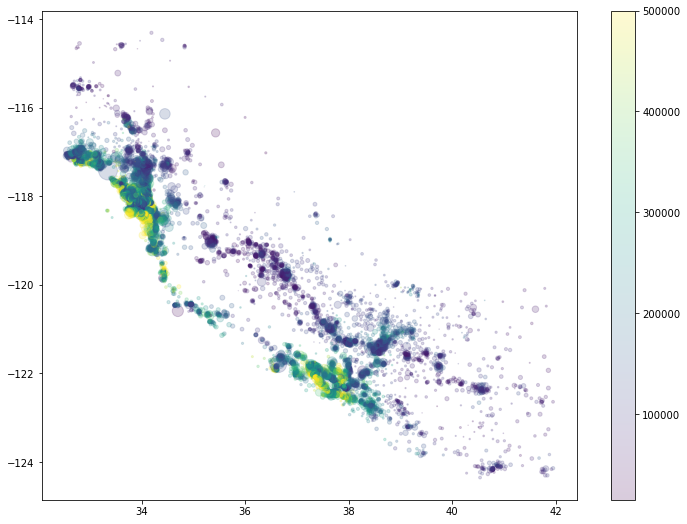

In [96]:
plt.figure(figsize = (12, 9))
plt.scatter(housing_data.latitude, housing_data.longitude, alpha = 0.2, c = housing_data.median_house_value, s = housing_data.population/100)
plt.colorbar()

## Plotting Histogram

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

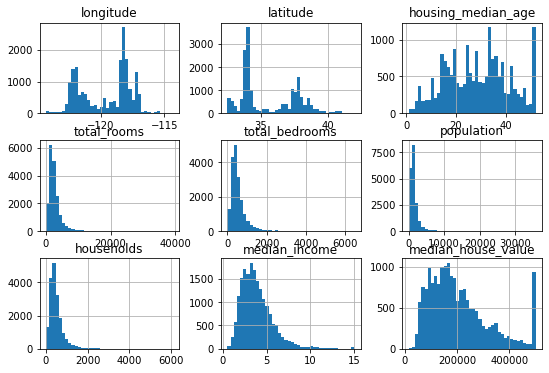

In [97]:
housing_data.hist(bins = 40, figsize = (9,6))

## Preparing Data

1. Added dummy columns for ocean_proximity column
2. Removed latitude and longitude columns.
3. Filled empty values in total_bedrooms with median value.

In [98]:
housing_one_hot_encoded_data = pd.get_dummies(housing_data, columns = ['ocean_proximity'])
housing_data_prepared = housing_one_hot_encoded_data.drop(columns =['latitude','longitude'])
housing_data_prepared['total_bedrooms'].fillna(housing_data_prepared.total_bedrooms.median(), inplace = True)

housing_data_prepared

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
3,52,919,213.0,413,193,4.0368,269700,0,0,0,1,0
4,52,2535,489.0,1094,514,3.6591,299200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18560,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
18561,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
18562,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
18563,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


## Normalizing Data

In [99]:
housing_data_normalized = housing_data_prepared.copy(deep=True)
μ = pd.Series({col: 0 for col in housing_data_prepared.columns}, dtype="float32")
σ = pd.Series({col: 0 for col in housing_data_prepared.columns}, dtype="float32")

for col in housing_data_prepared.columns:
    μ[col] = housing_data_prepared[col].mean()
    σ[col] = housing_data_prepared[col].std()
    housing_data_normalized[col] = (housing_data_prepared[col] - μ[col]) / σ[col]
housing_data_normalized.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.985664,-0.798771,-0.965803,-0.966437,-0.971129,2.351380,2.130692,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
1,-0.606157,2.033305,1.348871,0.853144,1.660496,2.338828,1.315600,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
2,1.861166,-0.458594,-0.608059,-0.753759,-0.625273,-0.010977,1.174410,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
3,1.861166,-0.781011,-0.766793,-0.886792,-0.796901,0.089551,0.546417,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
4,1.861166,-0.045099,-0.112903,-0.290768,0.037834,-0.109659,0.801945,-0.888262,-0.684295,-0.016413,2.836695,-0.385214


## Splitting test data and results

In [100]:
y = housing_data_normalized['median_house_value']
X = housing_data_normalized.drop(columns =['median_house_value'])

X[0:5]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.985664,-0.798771,-0.965803,-0.966437,-0.971129,2.351380,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
1,-0.606157,2.033305,1.348871,0.853144,1.660496,2.338828,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
2,1.861166,-0.458594,-0.608059,-0.753759,-0.625273,-0.010977,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
3,1.861166,-0.781011,-0.766793,-0.886792,-0.796901,0.089551,-0.888262,-0.684295,-0.016413,2.836695,-0.385214
4,1.861166,-0.045099,-0.112903,-0.290768,0.037834,-0.109659,-0.888262,-0.684295,-0.016413,2.836695,-0.385214


## Decision Tree Regression

In [102]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 15)
clf = DecisionTreeRegressor()

clf.fit(x_train, y_train)
clf.score(x_train,y_train)

1.0

In [103]:
y_pred = clf.predict(x_test)

In [34]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average = 'micro')
precision

0.02504713169943442